## Demographic & Financial data per area

This notebook is reserved to the study of some demographic and financial data in London district as well as carrying out principal components analysis so that to reduce the features I iwll merge with each restaurant information.

In [1]:
import requests
from bs4 import BeautifulSoup
import urllib2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sqlalchemy.engine import create_engine

In [2]:
#The dataset cames from the GLA: Greater London Authority
Dem_Fin=pd.read_csv("london-borough-profiles.csv")
Dem_Fin.head(2)

,Code,Area name,Inner/ Outer London,GLA Population Estimate 2015,GLA Household Estimate 2015,Inland Area (Hectares),Population density (per hectare) 2015,"Average Age, 2015","Proportion of population aged 0-15, 2015","Proportion of population of working-age, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2013/14,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,City of London,Inner London,8200,4700.0,290.4,28.2,41.9,11.0,72.0,...,6.0,5.6,NaN,2.6,124.6,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,203600,74010.0,3610.8,56.4,32.9,27.1,63.3,...,7.1,3.1,26.2,7.3,218.5,Lab,0.0,100.0,0.0,36.5


In [3]:
#Selecting the feature interesting for our projects and delecting rows regarding national data
demographic_financial_col=['Area name',\
                           'GLA Population Estimate 2015',\
                           'GLA Household Estimate 2015',\
                           'Inland Area (Hectares)',\
                           'Population density (per hectare) 2015',\
                           'Average Age, 2015',\
                           'Employment rate (%) (2014)',\
                           'Unemployment rate (2014)',\
                           'Gross Annual Pay, (2014)',\
                           'Modelled Household median income estimates 2012/13',\
                           'Number of jobs by workplace (2013)',\
                           'Jobs Density, 2013',\
                           'Two-year business survival rates (started in 2011)',\
                           'Median House Price, 2014',\
                           'Average Public Transport Accessibility score, 2014',\
                           'People aged 17+ with diabetes (%)']
Dem_Fin=Dem_Fin.loc[Dem_Fin["Average Public Transport Accessibility score, 2014"].notnull(),demographic_financial_col]
Dem_Fin=Dem_Fin.loc[~Dem_Fin["Area name"].isin(["London","Outer London","Inner London"]),:]
Dem_Fin.reset_index(inplace=True,drop=True)
Dem_Fin.head()

,Area name,GLA Population Estimate 2015,GLA Household Estimate 2015,Inland Area (Hectares),Population density (per hectare) 2015,"Average Age, 2015",Employment rate (%) (2014),Unemployment rate (2014),"Gross Annual Pay, (2014)",Modelled Household median income estimates 2012/13,Number of jobs by workplace (2013),"Jobs Density, 2013",Two-year business survival rates (started in 2011),"Median House Price, 2014","Average Public Transport Accessibility score, 2014",People aged 17+ with diabetes (%)
0,City of London,8200,4700.0,290.4,28.2,41.9,NaN,NaN,NaN,99390.0,460700.0,81.0,63.8,765000,7.9,2.6
1,Barking and Dagenham,203600,74010.0,3610.8,56.4,32.9,63.6,11.5,27252.0,34080.0,54300.0,0.0,73.0,215000,3.0,7.3
2,Barnet,383100,144180.0,8674.8,44.2,37.1,70.2,4.8,32044.0,54530.0,159400.0,1.0,72.1,400000,3.0,6.0
3,Bexley,240600,95180.0,6058.1,39.7,38.9,75.2,5.4,32724.0,44430.0,80300.0,1.0,76.7,250000,2.6,6.9
4,Brent,325300,115420.0,4323.3,75.2,35.4,68.0,7.0,30648.0,39630.0,122400.0,1.0,73.9,385000,3.7,7.9


As you can see, data are from 2011 to 2015. I am assuming that all features evolve proportionaly to each other.
Thea area name, or District name, is our primary key, on which we will merge the df dataframe so that each restaurant get the value regarding its area.

In [4]:
Dem_Fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
Area name                                             33 non-null object
GLA Population Estimate 2015                          33 non-null int64
GLA Household Estimate 2015                           33 non-null float64
Inland Area (Hectares)                                33 non-null float64
Population density (per hectare) 2015                 33 non-null float64
Average Age, 2015                                     33 non-null float64
Employment rate (%) (2014)                            32 non-null float64
Unemployment rate (2014)                              32 non-null float64
Gross Annual Pay, (2014)                              32 non-null float64
Modelled Household median income estimates 2012/13    33 non-null float64
Number of jobs by workplace (2013)                    33 non-null float64
Jobs Density, 2013                                    33 non-null float64
Two-year bus

In [5]:
thecity=Dem_Fin.loc[Dem_Fin["Area name"]=="City of London",:].copy()
gross_pay=thecity["Modelled Household median income estimates 2012/13"]*thecity["GLA Household Estimate 2015"]/(thecity["GLA Population Estimate 2015"])
print "City of London is the only district with missing data, maybe due to the high difference with the rest of the uk"
print "Gross annual pay estimation",gross_pay
print "Employement rate estimation", Dem_Fin["Employment rate (%) (2014)"].max()
print "Unemployement rate estimation", Dem_Fin["Unemployment rate (2014)"].min()

Dem_Fin.loc[Dem_Fin["Area name"]=="City of London","Employment rate (%) (2014)"]=\
Dem_Fin["Employment rate (%) (2014)"].max()

Dem_Fin.loc[Dem_Fin["Area name"]=="City of London","Unemployment rate (2014)"]=\
Dem_Fin["Unemployment rate (2014)"].min()

Dem_Fin.loc[Dem_Fin["Area name"]=="City of London","Gross Annual Pay, (2014)"]=gross_pay

Dem_Fin.head(1)

City of London is the only district with missing data, maybe due to the high difference with the rest of the uk
Gross annual pay estimation 0    56967.439024
dtype: float64
Employement rate estimation 80.2
Unemployement rate estimation 4.2


,Area name,GLA Population Estimate 2015,GLA Household Estimate 2015,Inland Area (Hectares),Population density (per hectare) 2015,"Average Age, 2015",Employment rate (%) (2014),Unemployment rate (2014),"Gross Annual Pay, (2014)",Modelled Household median income estimates 2012/13,Number of jobs by workplace (2013),"Jobs Density, 2013",Two-year business survival rates (started in 2011),"Median House Price, 2014","Average Public Transport Accessibility score, 2014",People aged 17+ with diabetes (%)
0,City of London,8200,4700.0,290.4,28.2,41.9,80.2,4.2,56967.439024,99390.0,460700.0,81.0,63.8,765000,7.9,2.6


In [6]:
Dem_Fin.describe()

,GLA Population Estimate 2015,GLA Household Estimate 2015,Inland Area (Hectares),Population density (per hectare) 2015,"Average Age, 2015",Employment rate (%) (2014),Unemployment rate (2014),"Gross Annual Pay, (2014)",Modelled Household median income estimates 2012/13,Number of jobs by workplace (2013),"Jobs Density, 2013",Two-year business survival rates (started in 2011),"Median House Price, 2014","Average Public Transport Accessibility score, 2014",People aged 17+ with diabetes (%)
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,3.300000e+01,33.000000,33.000000
mean,262524.242424,104254.848485,4764.081818,72.760606,36.100000,71.645455,6.933333,33999.952698,53604.242424,162484.848485,3.303030,74.148485,4.290288e+05,3.951515,5.839394
std,74023.737875,27742.642619,3270.919554,37.993107,2.415057,4.876416,1.893024,5781.925637,17802.286375,132186.870852,13.967563,3.209373,2.061033e+05,1.304588,1.344884
min,8200.000000,4700.000000,290.400000,21.600000,31.200000,60.500000,4.200000,25815.000000,34080.000000,54300.000000,0.000000,63.800000,2.150000e+05,2.400000,2.600000
25%,224600.000000,88720.000000,2681.000000,44.200000,34.800000,68.200000,5.300000,30800.000000,44430.000000,83400.000000,1.000000,73.000000,3.070000e+05,3.000000,5.000000
50%,271800.000000,106600.000000,3762.500000,57.700000,35.900000,71.900000,6.900000,32269.000000,45860.000000,123300.000000,1.000000,74.900000,3.850000e+05,3.400000,5.900000
75%,318000.000000,123760.000000,5641.900000,106.300000,37.400000,75.000000,7.800000,36546.000000,56920.000000,166900.000000,1.000000,76.600000,4.330000e+05,4.900000,6.600000
max,383100.000000,152750.000000,15013.500000,151.200000,41.900000,80.200000,11.500000,56967.439024,116350.000000,717400.000000,81.000000,79.100000,1.195000e+06,7.900000,8.500000


This basics that points out the fact we have to be carefull on how to comparing areas, firstly because some are much wider than other ( from 290 Hec to 15000 Hec) but also because of other factors such as areas with more jobs than inhabitans which means that it's a place for restaurant to maximize their sells at lunch for example.
For better comprehension of the range of value per area for each information, I am drawing the charts belows.

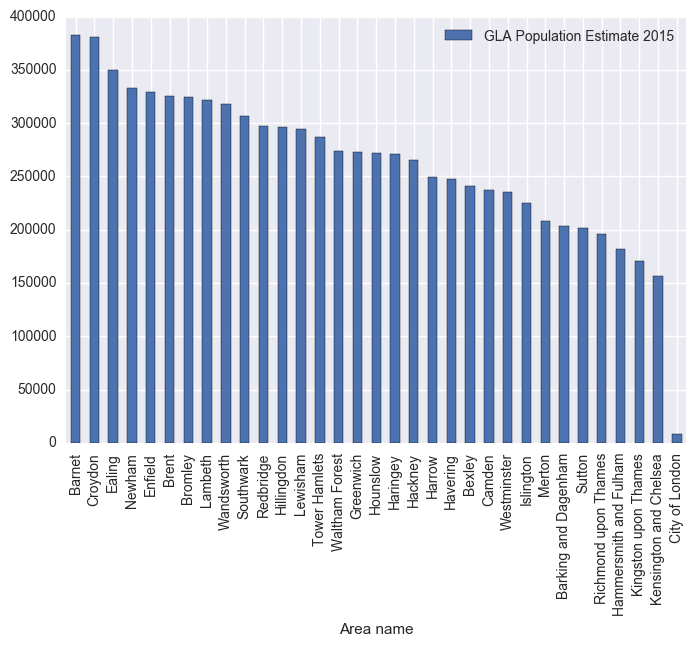

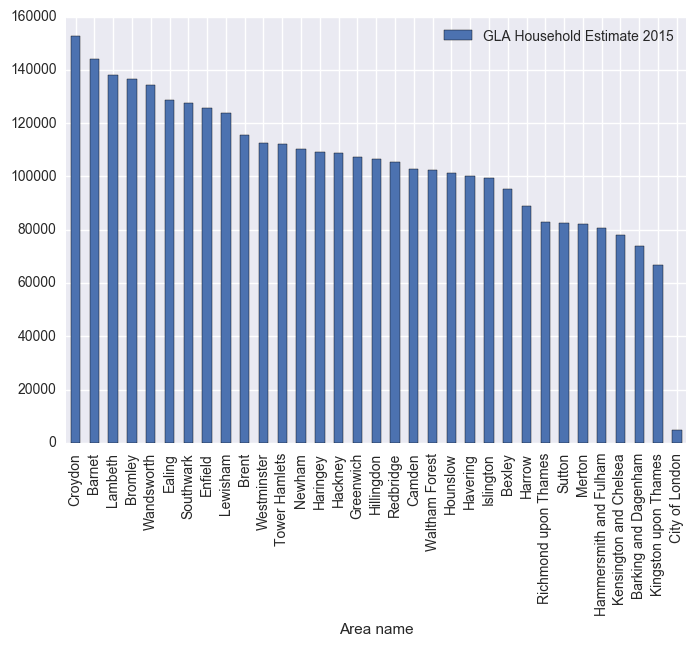

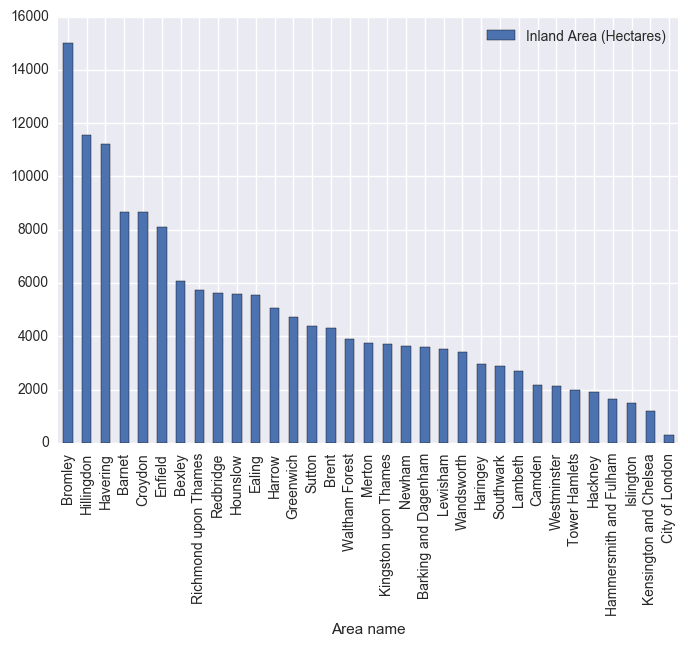

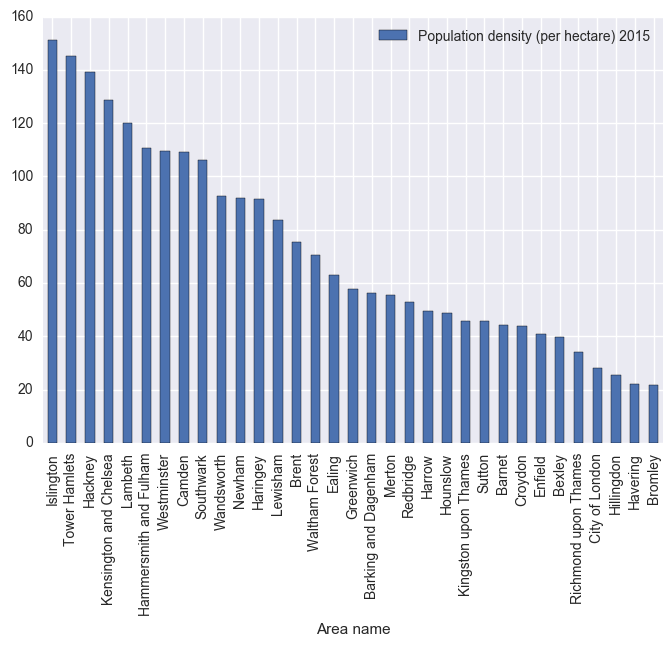

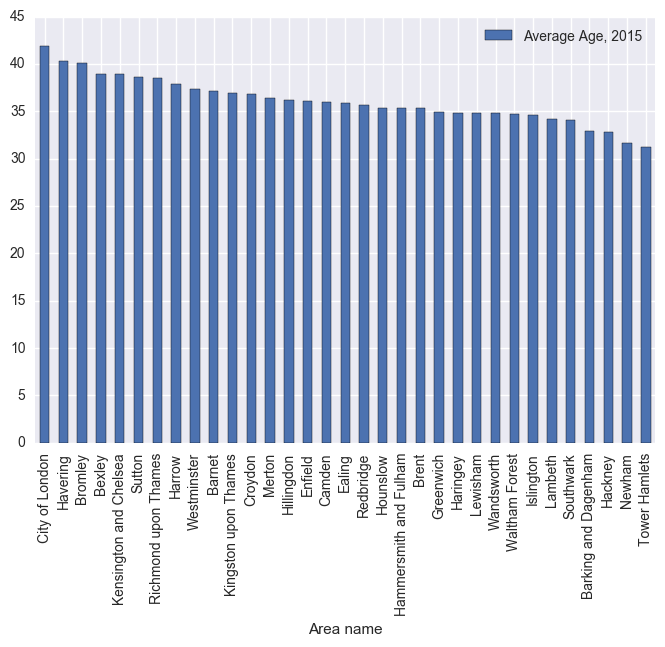

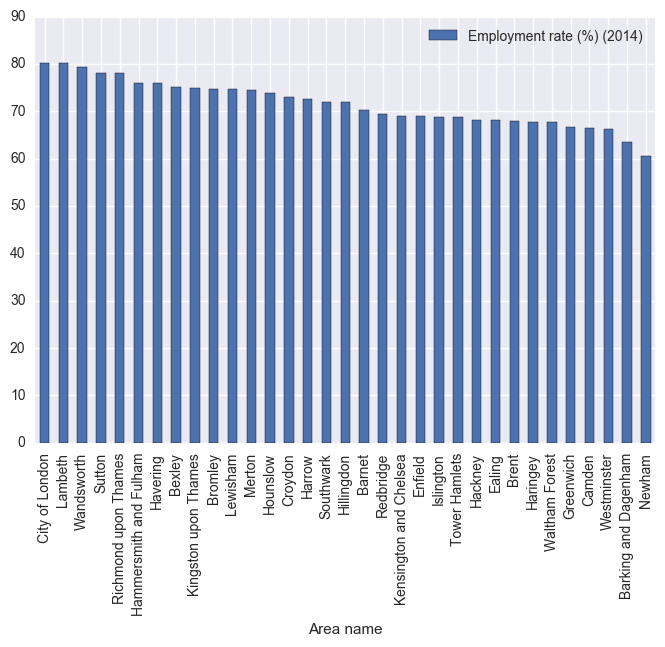

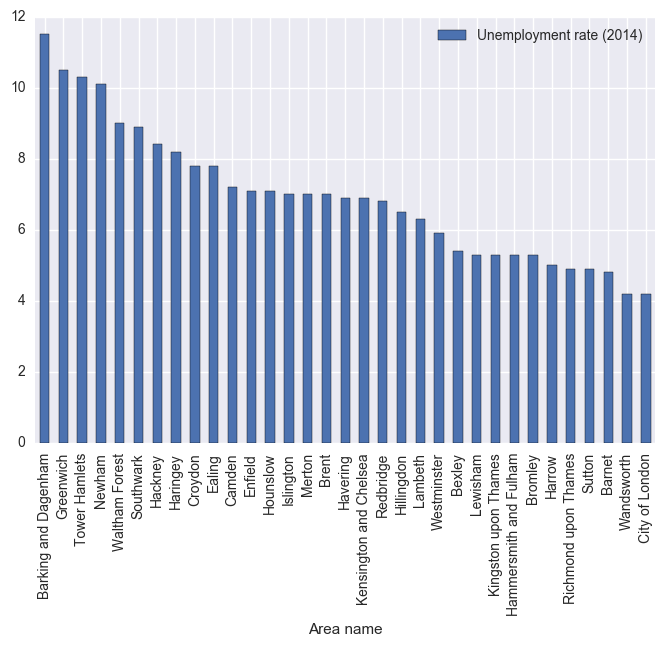

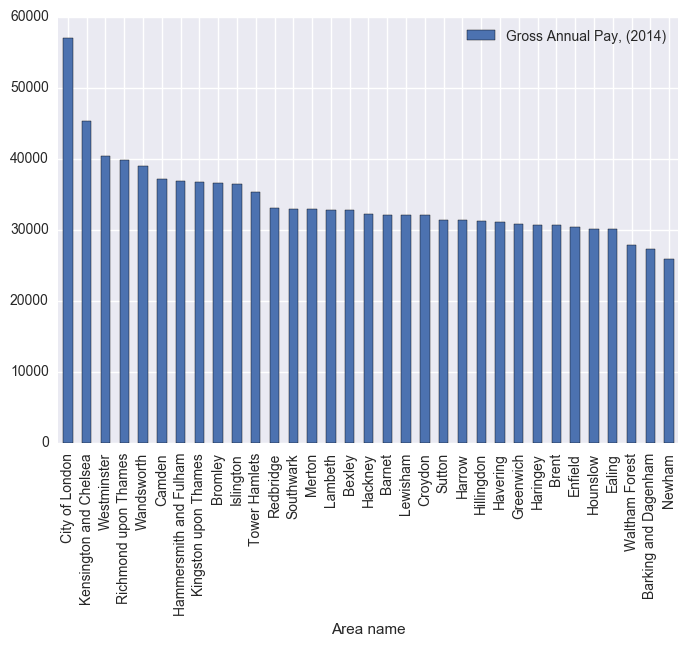

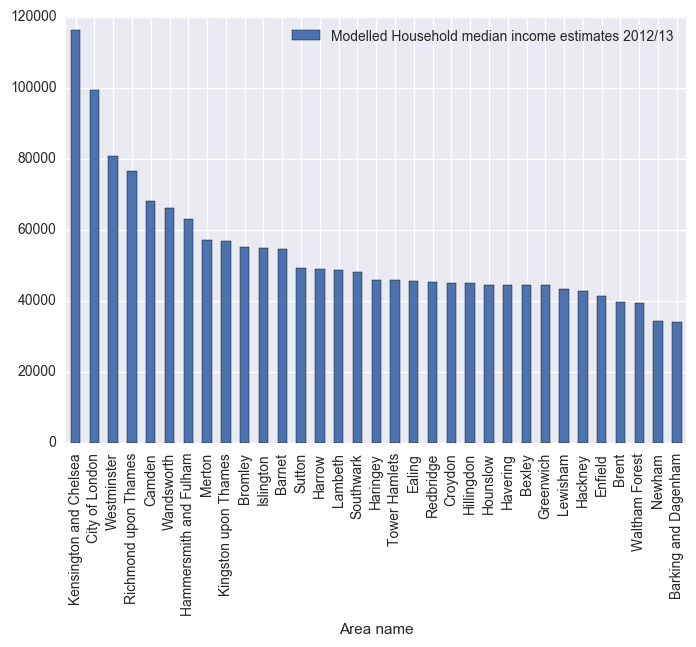

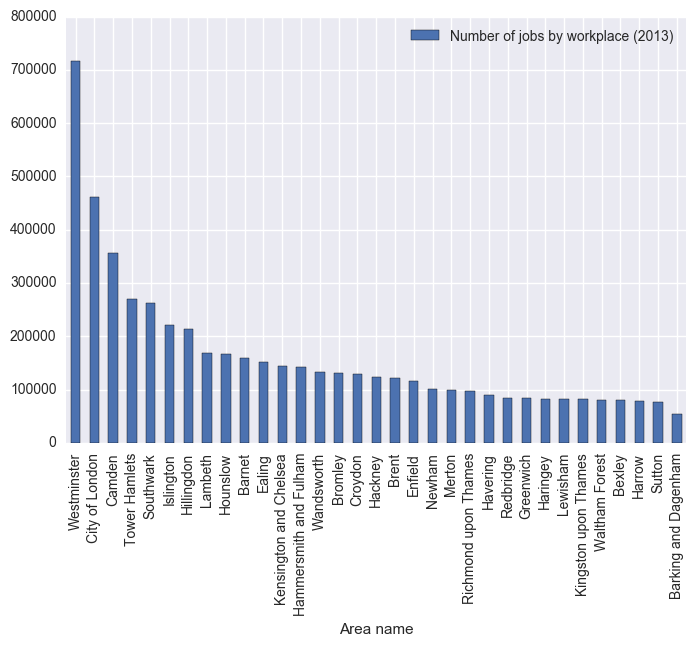

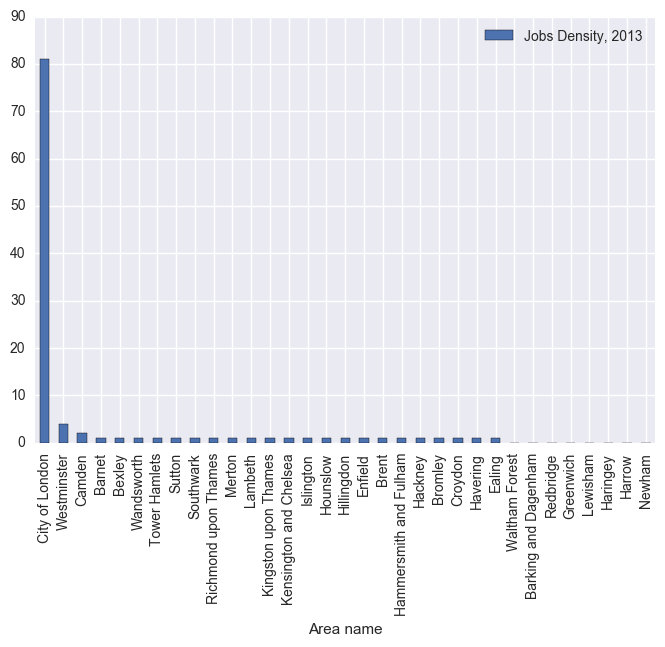

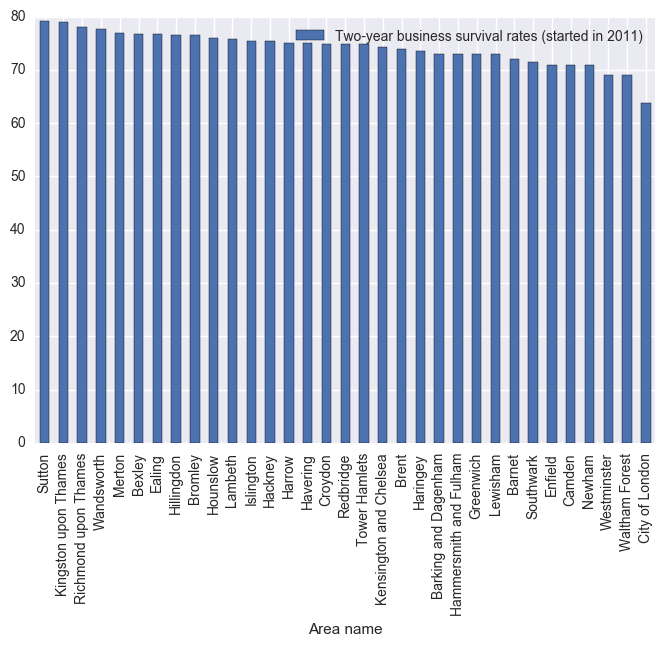

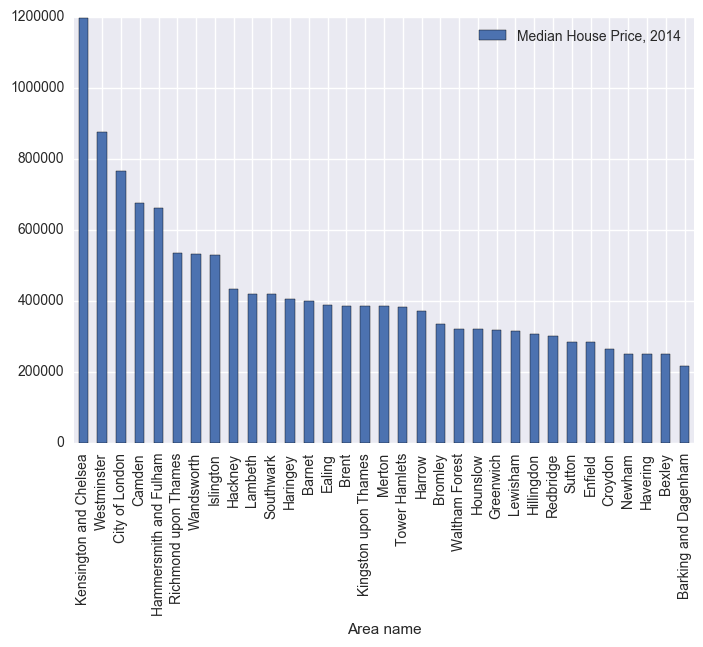

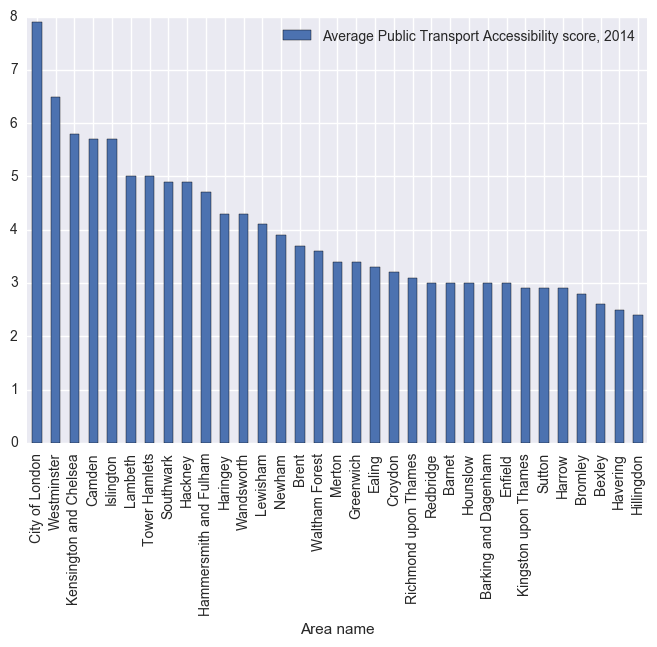

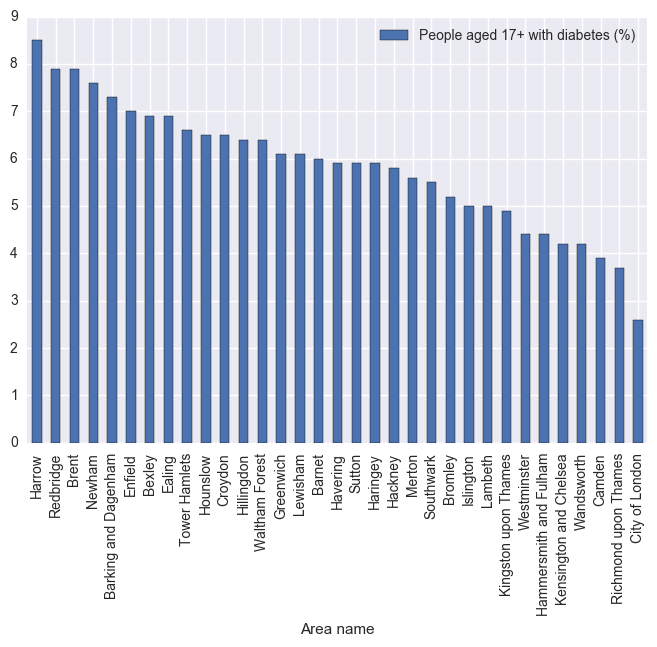

In [7]:
for item in Dem_Fin.columns[1:]:
    Dem_Fin.sort_values(by=item,ascending=False).plot(kind="bar",x="Area name",y=item)
    plt.show()

This bunch of graphs highlight the diffference between area. For example, City of London benefit of a high job density while almost no place to live. Also it's interesting to notice that more than 70% of business survive after 2 years.

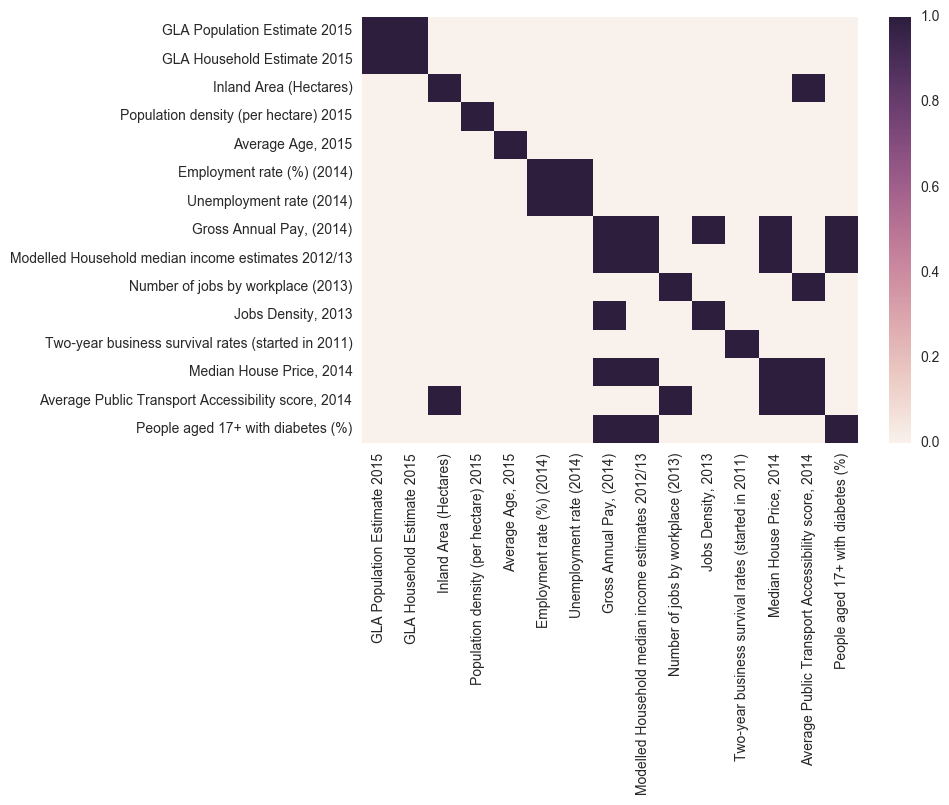

In [8]:
# Let's see if some correlation stands out,i.e with a correlation coefficient > 0.7:

sns.heatmap(np.absolute(Dem_Fin.corr())>0.70)
plt.show()

This graph shows interesting correlation  such as the diabetes being linked to Household income as well as intuitive correlation between median house price and Transport Accesiibility 

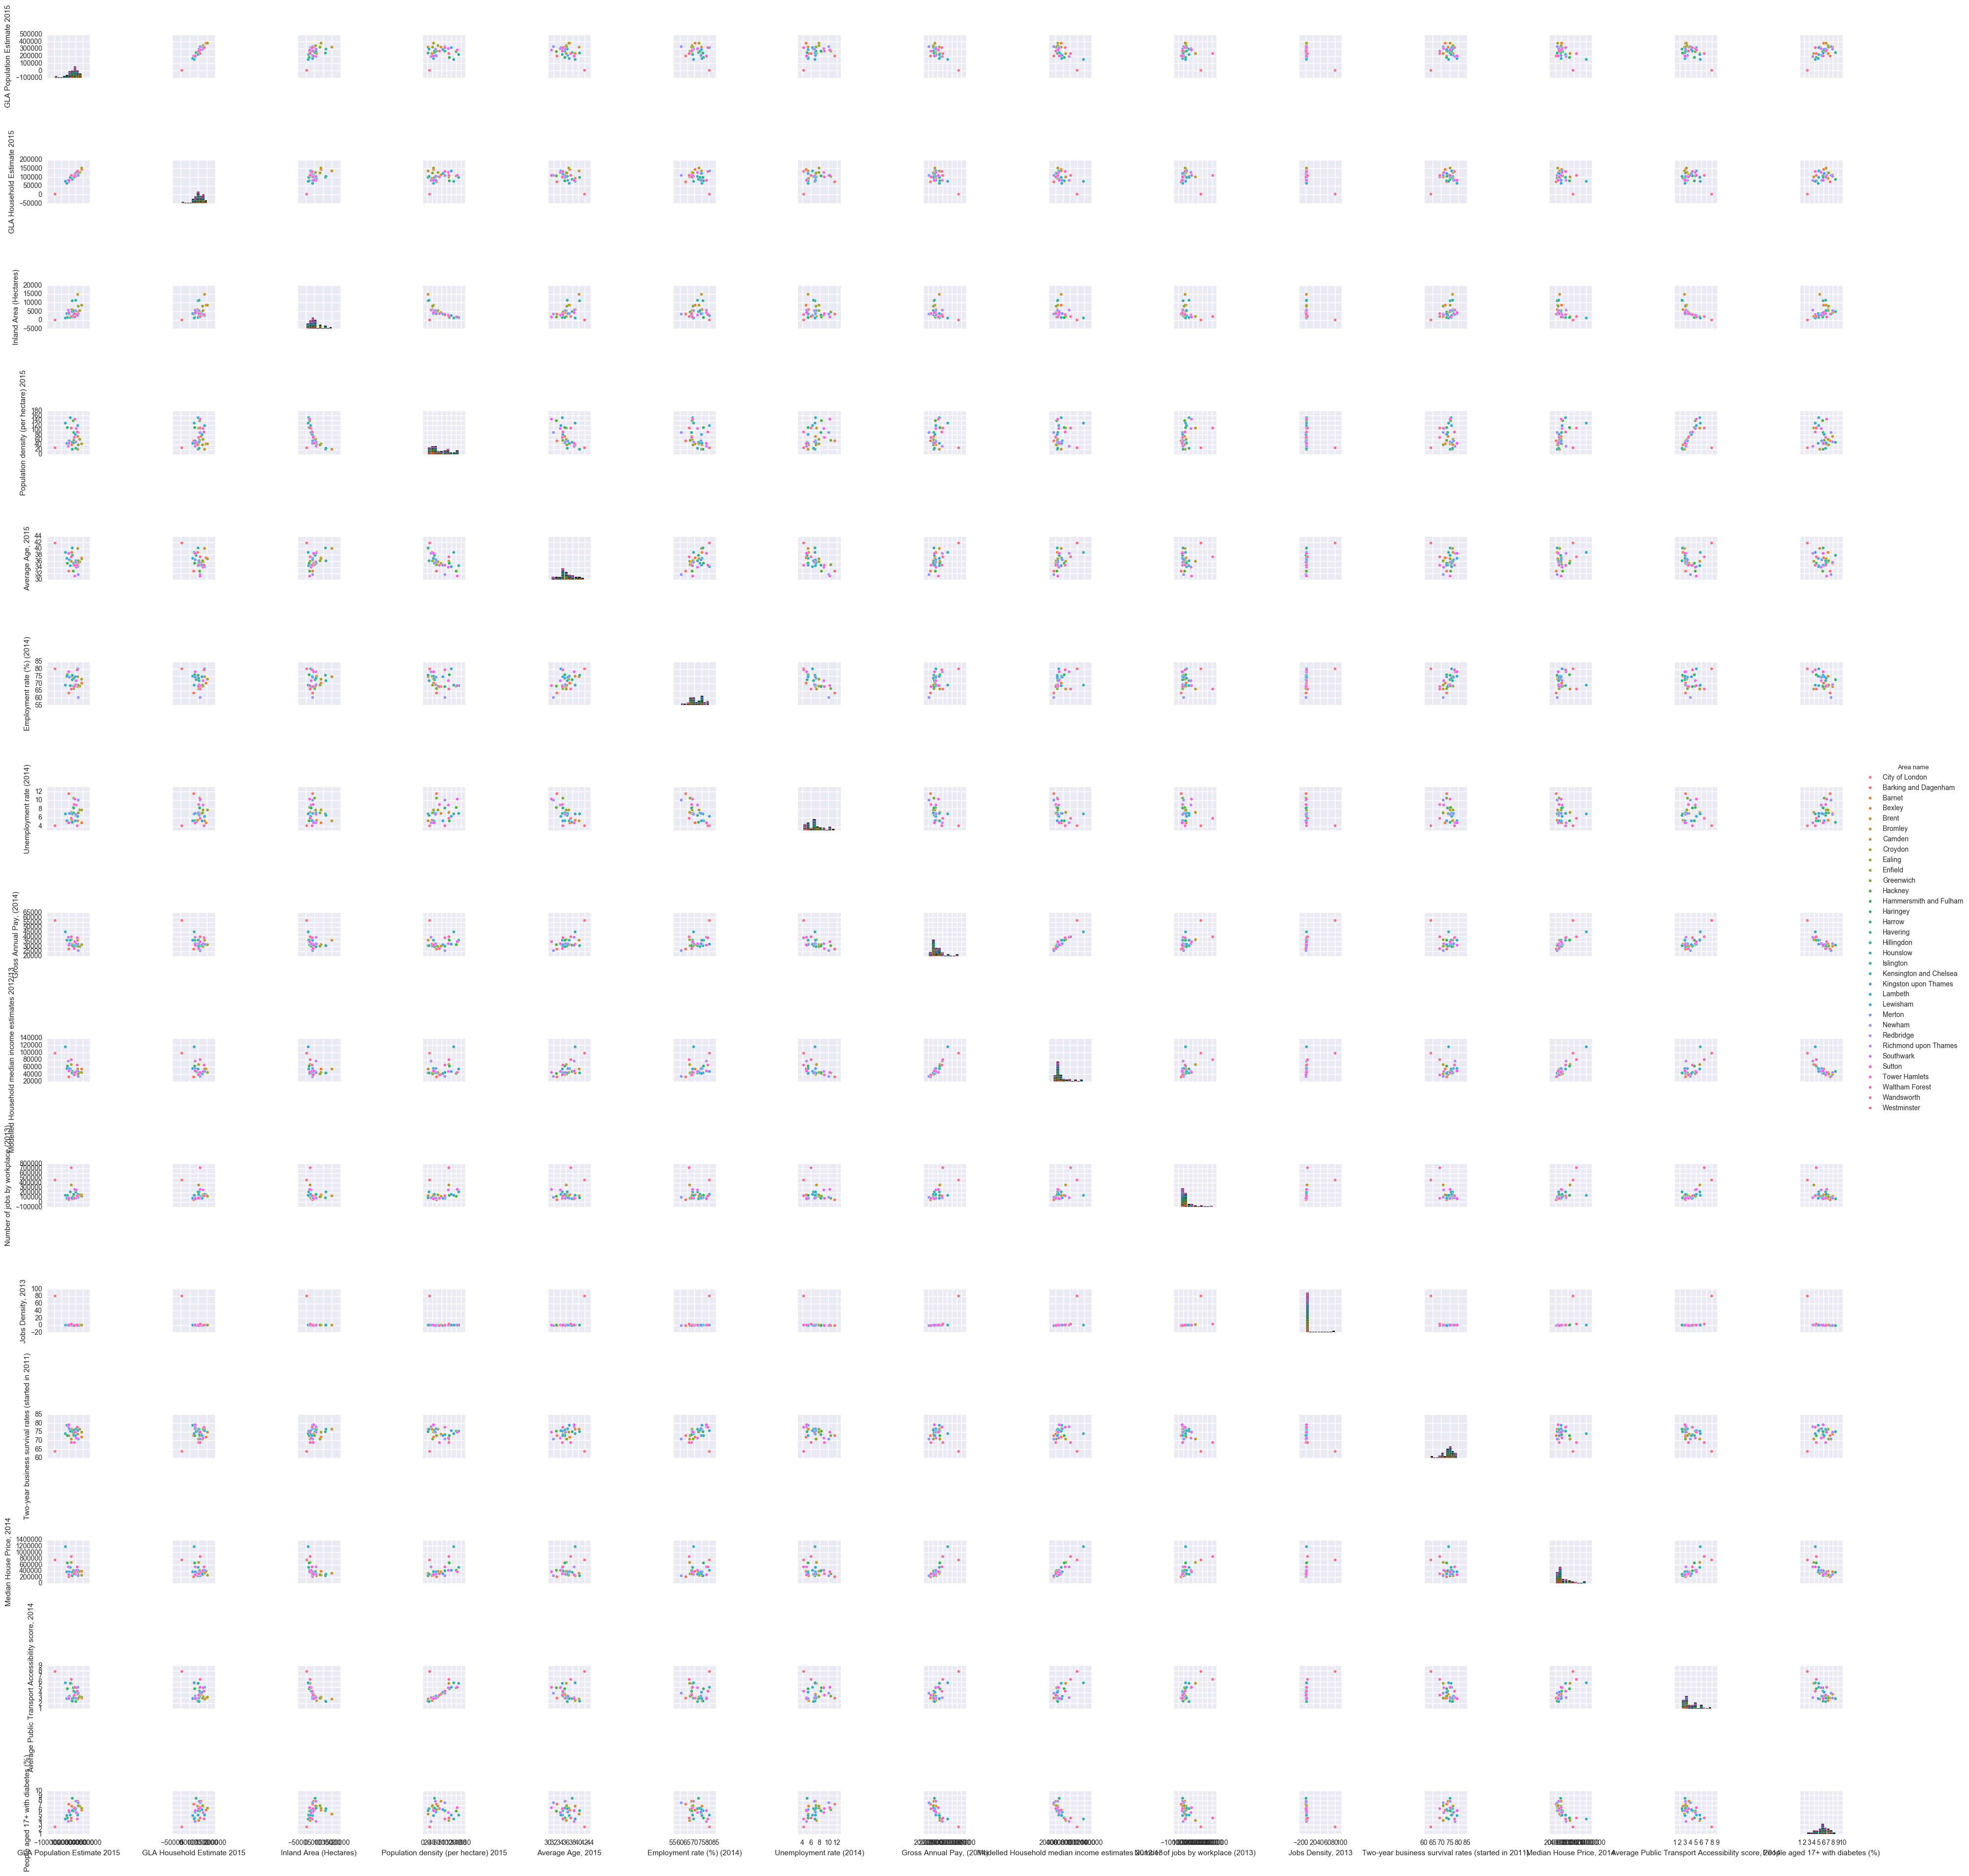

In [9]:
sns.pairplot(Dem_Fin,hue="Area name")
plt.xticks(rotation=90)
plt.show()

In addition to the correlation, while zooming on graphs, we can notice tha it seems to have some clusters that we might highlight after performing a principal components analysis along with clustering methods

In [10]:
Dem_Fin.to_csv("demographic_financial.csv")

___
### Principal Components Analysis

This last step of the notebook is to perform a reduction on the number information (Demographic and Financial) over each district and assess wether to link each restaurant to the whole demographic and financial information or to only some principal components trying to avoid overfitting on a future model.

In [11]:

# standardize Data
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(Dem_Fin.iloc[:,1:])

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [13]:
exp_var=pca.explained_variance_ #explained variance of the principal components
exp_var_rat=pca.explained_variance_ratio_ #ratio of total variance

cum_var=np.cumsum(exp_var)/sum(exp_var)

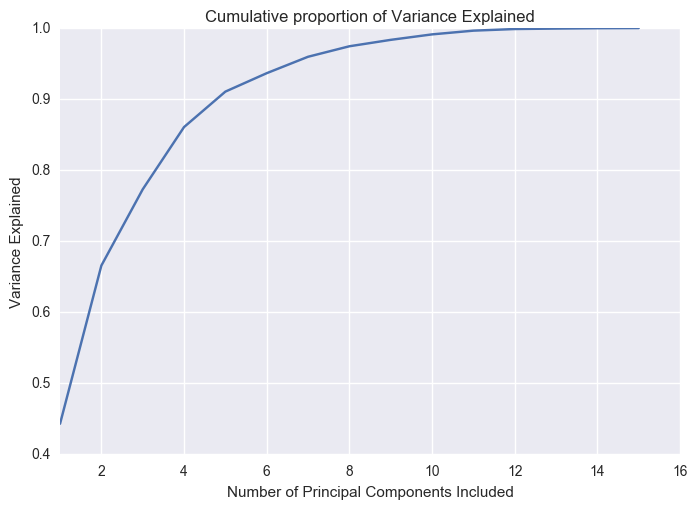

In [14]:
plt.plot(range(1, len(cum_var) + 1), cum_var)
plt.title("Cumulative proportion of Variance Explained")
plt.ylabel("Variance Explained")
plt.xlabel("Number of Principal Components Included")
plt.xlim((1,16))
plt.show()

As the graph above shown us, 5 princinpal components explained more than 90% of the variance.
Let's save those 5 PCA components. We will then link each restaurant to it's district PCA information.

In [15]:
Dem_Fin_reduced=pd.concat([Dem_Fin.iloc[:,0],pd.DataFrame(X_pca[:,:5],columns=["PCAf_1","PCAf_2","PCAf_3","PCAf_4","PCAf_5"])],axis=1)
Dem_Fin_reduced.head()

,Area name,PCAf_1,PCAf_2,PCAf_3,PCAf_4,PCAf_5
0,City of London,10.456275,1.600101,3.640806,1.005663,-1.583757
1,Barking and Dagenham,-2.265993,-1.686795,2.889678,-1.267319,0.771234
2,Barnet,-1.291491,1.074536,-0.829088,2.172387,0.088565
3,Bexley,-0.976845,2.295642,0.409946,-0.599508,-0.063218
4,Brent,-1.715826,-0.639217,0.352918,0.331697,-0.007829


In [16]:
Dem_Fin.head()

,Area name,GLA Population Estimate 2015,GLA Household Estimate 2015,Inland Area (Hectares),Population density (per hectare) 2015,"Average Age, 2015",Employment rate (%) (2014),Unemployment rate (2014),"Gross Annual Pay, (2014)",Modelled Household median income estimates 2012/13,Number of jobs by workplace (2013),"Jobs Density, 2013",Two-year business survival rates (started in 2011),"Median House Price, 2014","Average Public Transport Accessibility score, 2014",People aged 17+ with diabetes (%)
0,City of London,8200,4700.0,290.4,28.2,41.9,80.2,4.2,56967.439024,99390.0,460700.0,81.0,63.8,765000,7.9,2.6
1,Barking and Dagenham,203600,74010.0,3610.8,56.4,32.9,63.6,11.5,27252.000000,34080.0,54300.0,0.0,73.0,215000,3.0,7.3
2,Barnet,383100,144180.0,8674.8,44.2,37.1,70.2,4.8,32044.000000,54530.0,159400.0,1.0,72.1,400000,3.0,6.0
3,Bexley,240600,95180.0,6058.1,39.7,38.9,75.2,5.4,32724.000000,44430.0,80300.0,1.0,76.7,250000,2.6,6.9
4,Brent,325300,115420.0,4323.3,75.2,35.4,68.0,7.0,30648.000000,39630.0,122400.0,1.0,73.9,385000,3.7,7.9


In [19]:
Dem_Fin_reduced.to_csv("District_Financial_reduced.csv")

#loading to sql

engine=create_engine('postgresql://localhost:5432/capstone')
conn=engine.connect()
Dem_Fin_reduced.to_sql("Dem_Fin_reduced",con=conn,if_exists="replace")
Dem_Fin_for_sql=Dem_Fin.rename(columns = {'Population density (per hectare) 2015':'Population density - Hec-2015',\
                                 "Employment rate (%) (2014)":"Employment rate - 2014",\
                                 "Gross Annual Pay, (2014)":"Gross Annual Pay-2014",\
                                 "Number of jobs by workplace (2013)":"Number of jobs by workplace-2013",\
                                 "Two-year business survival rates (started in 2011)":"Two-year business survival rates-2011/2015",\
                                 "People aged 17+ with diabetes (%)":"Perc. People aged 17+ with diabetes ",\
                                 'Unemployment rate (2014)':'Unemployment rate-2014',\
                                 'Inland Area (Hectares)':'Inland Area -hec'})
                  
Dem_Fin_for_sql.to_sql("Dem_Fin_1",con=conn,if_exists="replace")

## Summary

Demographic/ Financial data are from 2011 to 2015, which means that we are not working with actual data.
However, we can assume that it evolve proportionaly which means when we will scale the data, our margin of error will be reduced. 

The EDA clearly points out the differences between area from density of job, income per habitant, median house price to % of diabetes which can surely explain the restaurant habit in each of this area.

__Next steps:__

- Getting more information about restaurant from Zomato,Tripadvisor
- Analysis the location and cuisine of restaurant in function of all demographic and financial data.
- Categorise the well functioning of a restaurant
- Fit a model on my dataset 